In [2]:
import nltk

nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leonardoscholler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/leonardoscholler/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
texts = []

for i in range(1,24):
    with open(f'../dados/juliano_rigatti_en/{i}.txt', 'r') as file:
        texts.append(file.read())

texts

["- I don't know what to do. I was waiting to get out of my doctoral scholarship at the university, but they're dragging me around and I don't think I can get out. A month ago I had a meeting, they said that they really liked my line of research and that they didn't let me down. Yesterday, everything changed. They want me to pay, but I can't afford it. After years of dedication as a teacher, I was counting on that money. It would be very important for my income. I don't even know what to think.\n- I was listening to you and I think I identified some feelings there. Maybe sadness, frustration, disappointment... Could it be?\n- It could be, yes. There are certainly three. Disappointment, anxiety too.\n- Hmm. Maybe you're also afraid of running out of income?\n- Yes true. He's afraid too. I didn't realize it and it could be influenced in my reactivity towards them.\n- And I imagine that the fear comes because you have a strong need for material security. It makes sense?\n- Total. Good to 

In [4]:
processed_texts = []
for text in texts:
    split_text = text.split('===')[0].strip().split('\n')

    # Extracting alternating messages
    intrigue_messages = split_text[::2]
    peacemaker_messages = split_text[1::2]

    # Creating schema
    result = []
    for i in range(len(intrigue_messages)):
        result.append({
            "agent": "agente intrigante",
            "message": intrigue_messages[i].replace('- ', '')
        })
        if i < len(peacemaker_messages):
            result.append({
                "agent": "agente empático",
                "message": peacemaker_messages[i].replace('- ', '')
            })
    
    print(len(result))
    processed_texts.append(result[0:5])

processed_texts

10
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


[[{'agent': 'agente intrigante',
   'message': "I don't know what to do. I was waiting to get out of my doctoral scholarship at the university, but they're dragging me around and I don't think I can get out. A month ago I had a meeting, they said that they really liked my line of research and that they didn't let me down. Yesterday, everything changed. They want me to pay, but I can't afford it. After years of dedication as a teacher, I was counting on that money. It would be very important for my income. I don't even know what to think."},
  {'agent': 'agente empático',
   'message': 'I was listening to you and I think I identified some feelings there. Maybe sadness, frustration, disappointment... Could it be?'},
  {'agent': 'agente intrigante',
   'message': 'It could be, yes. There are certainly three. Disappointment, anxiety too.'},
  {'agent': 'agente empático',
   'message': "Hmm. Maybe you're also afraid of running out of income?"},
  {'agent': 'agente intrigante',
   'message':

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

for text in processed_texts:
    for message in text:
        message.update(sid.polarity_scores( message['message']))

processed_texts

[[{'agent': 'agente intrigante',
   'message': "I don't know what to do. I was waiting to get out of my doctoral scholarship at the university, but they're dragging me around and I don't think I can get out. A month ago I had a meeting, they said that they really liked my line of research and that they didn't let me down. Yesterday, everything changed. They want me to pay, but I can't afford it. After years of dedication as a teacher, I was counting on that money. It would be very important for my income. I don't even know what to think.",
   'neg': 0.017,
   'neu': 0.893,
   'pos': 0.09,
   'compound': 0.767},
  {'agent': 'agente empático',
   'message': 'I was listening to you and I think I identified some feelings there. Maybe sadness, frustration, disappointment... Could it be?',
   'neg': 0.286,
   'neu': 0.714,
   'pos': 0.0,
   'compound': -0.7184},
  {'agent': 'agente intrigante',
   'message': 'It could be, yes. There are certainly three. Disappointment, anxiety too.',
   'neg

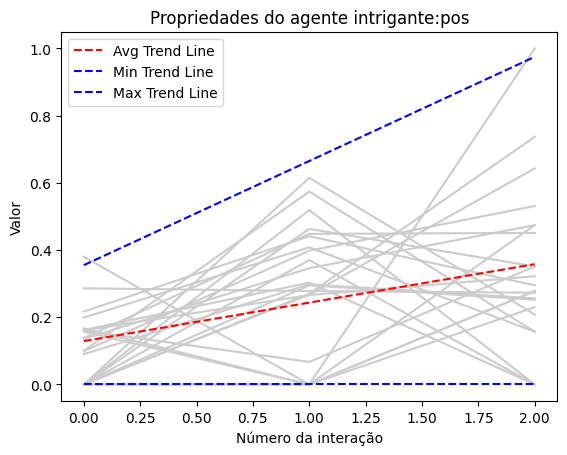

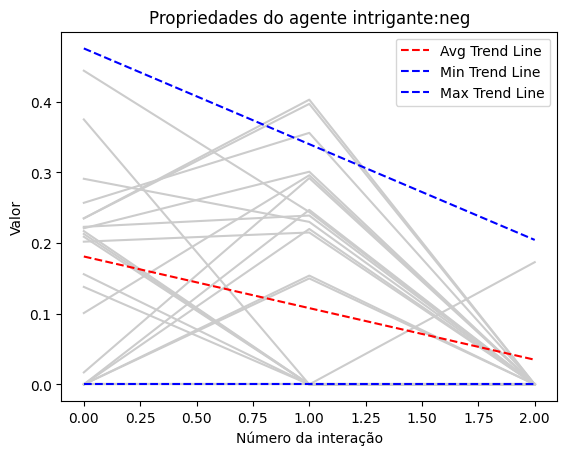

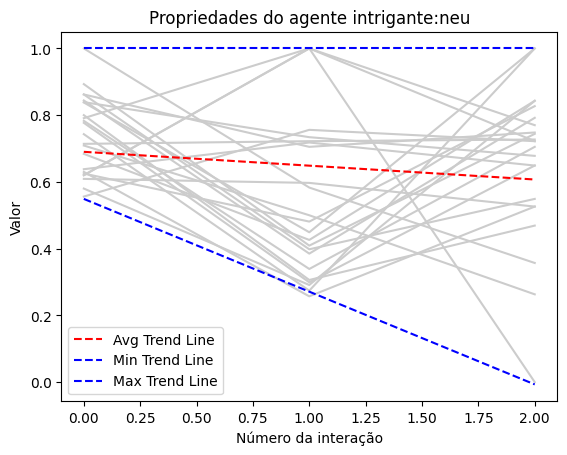

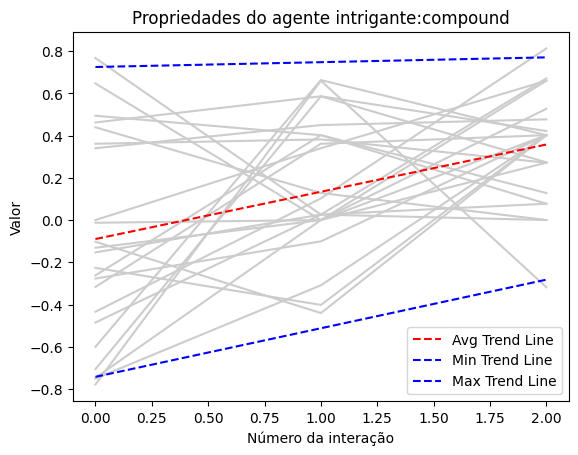

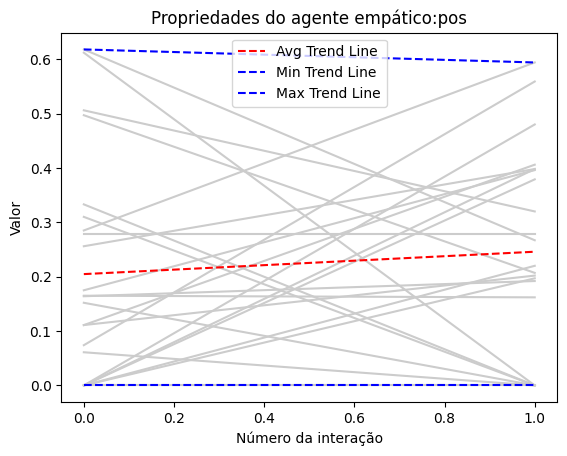

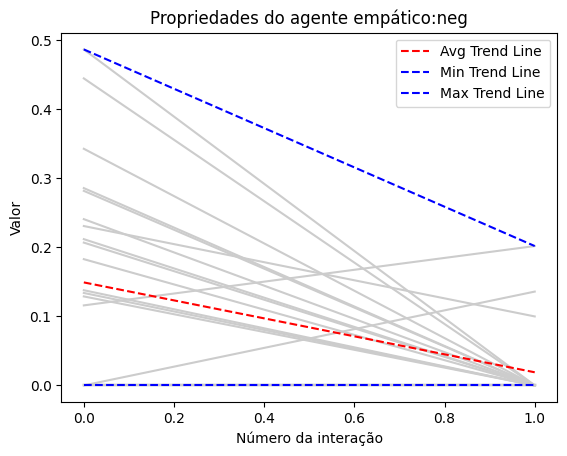

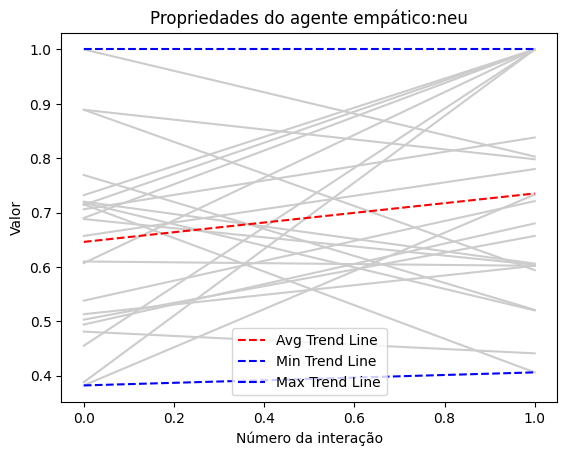

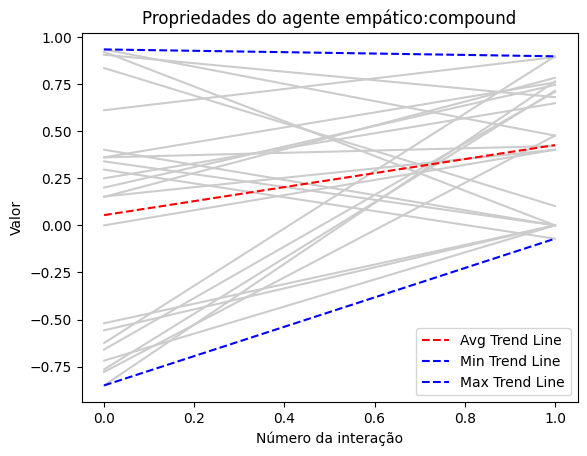

In [6]:
import matplotlib.pyplot as plt
import numpy as np

for agent in ['agente intrigante', 'agente empático']:
    for category in ['pos', 'neg', 'neu', 'compound']:
        data = np.array([[d[category] for d in x if d['agent'] == agent] for x in processed_texts])
        for x in data:
            plt.plot(range(len(x)), x, '#ccc')
        data = data.T

        # x values are just indices
        x = np.arange(len(data))

        avg_y = np.mean(data, axis=1)
        min_y = np.min(data, axis=1)
        max_y = np.max(data, axis=1)

        # calculate polynomial fit (degree = 1 for linear)
        coef_avg = np.polyfit(x, avg_y, 1)
        coef_min = np.polyfit(x, min_y, 1)
        coef_max = np.polyfit(x, max_y, 1)

        poly1d_fn_avg = np.poly1d(coef_avg)
        poly1d_fn_min = np.poly1d(coef_min) 
        poly1d_fn_max = np.poly1d(coef_max)

        plt.plot(x, poly1d_fn_avg(x), '--r', label='Avg Trend Line')
        plt.plot(x, poly1d_fn_min(x), '--b', label='Min Trend Line')
        plt.plot(x, poly1d_fn_max(x), '--b', label='Max Trend Line')

        plt.xlabel('Número da interação')
        plt.ylabel('Valor')
        plt.title(f'Propriedades do {agent}:{category}')
        plt.legend()
        plt.show()